In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mplfinance as mpf
import yfinance
import ta
from datetime import datetime
import config
import MetaTrader5 as mt5

# Initialize MT5

In [2]:
if not mt5.initialize(config.PATH,
                      login=config.USERNAME,
                      password=config.PASSWORD,
                      server=config.SERVER
                      ):
    print("initialize() failed")
    mt5.shutdown()
# request connection status and parameters
print(mt5.terminal_info())
# get data on MetaTrader 5 version
print(mt5.version())

TerminalInfo(community_account=False, community_connection=False, connected=True, dlls_allowed=False, trade_allowed=False, tradeapi_disabled=False, email_enabled=False, ftp_enabled=False, notifications_enabled=False, mqid=False, build=2715, maxbars=100000, codepage=0, ping_last=464477, community_balance=0.0, retransmission=0.021925149974116143, company='MetaQuotes Software Corp.', name='MetaTrader 5', language='English', path='C:\\Program Files\\MetaTrader 5', data_path='C:\\Users\\ChiChaChai\\AppData\\Roaming\\MetaQuotes\\Terminal\\D0E8209F77C8CF37AD8BF550E51FF075', commondata_path='C:\\Users\\ChiChaChai\\AppData\\Roaming\\MetaQuotes\\Terminal\\Common')
(500, 2715, '26 Nov 2020')


# Import data

In [3]:
eur_df = pd.DataFrame(mt5.copy_rates_range("EURUSDm", mt5.TIMEFRAME_D1, datetime(2015, 12, 1), datetime.now()))
eur_df['time'] = pd.to_datetime(eur_df['time'], unit='s')
eur_df.set_index('time', inplace=True)
eur_df

,open,high,low,close,tick_volume,spread,real_volume
time,,,,,,,
2015-12-01,1.05689,1.06365,1.05626,1.06257,132441,0,0
2015-12-02,1.06251,1.06316,1.05502,1.06098,144697,0,0
2015-12-03,1.06097,1.09800,1.05184,1.09169,239158,0,0
2015-12-04,1.09181,1.09555,1.08352,1.08813,197149,0,0
2015-12-06,1.08727,1.08865,1.08628,1.08805,6620,0,0
...,...,...,...,...,...,...,...
2020-12-02,1.20703,1.21180,1.20396,1.21128,44784,10,0
2020-12-03,1.21136,1.21741,1.21007,1.21420,41650,10,0
2020-12-04,1.21447,1.21770,1.21097,1.21156,44315,10,0


# Pre-processing

## Define target

In [4]:
df = eur_df.copy()
df = df.ffill()
df['return'] = df['close'].shift(-1) - df['close']

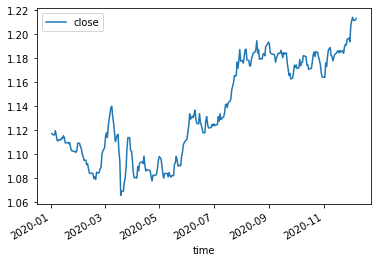

In [5]:
df.loc['2020-01-01':].plot(y='close')

In [6]:
df['next_close'] = df['close'].shift(-1)
df.tail(20)

,open,high,low,close,tick_volume,spread,real_volume,return,next_close
time,,,,,,,,,
2020-11-15,1.18305,1.18458,1.18283,1.18418,927,60,0,0.00163,1.18581
2020-11-16,1.18443,1.18683,1.18138,1.18581,38922,10,0,0.00043,1.18624
2020-11-17,1.18589,1.18933,1.18422,1.18624,30377,10,0,-0.00183,1.18441
2020-11-18,1.18632,1.18905,1.18420,1.18441,32882,10,0,0.00200,1.18641
2020-11-19,1.18449,1.18820,1.18159,1.18641,34606,10,0,-0.00128,1.18513
2020-11-20,1.18650,1.18903,1.18494,1.18513,29656,10,0,0.00113,1.18626
2020-11-22,1.18507,1.18631,1.18498,1.18626,804,60,0,-0.00215,1.18411
2020-11-23,1.18652,1.19055,1.17997,1.18411,35482,10,0,0.00552,1.18963
2020-11-24,1.18419,1.18966,1.18381,1.18963,36094,10,0,0.00189,1.19152


In [7]:
df.dropna(inplace=True)

## Feature Engineering

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
X = df[['open', 'high', 'low', 'close', 'tick_volume', 'spread']]
Y = df['next_close'].copy()

In [10]:
feature_scaler = StandardScaler()
X.loc[:, X.columns] = feature_scaler.fit_transform(X)

target_scaler = StandardScaler()
Y[:] = target_scaler.fit_transform(np.expand_dims(Y.values, axis=1))[:, 0]

c:\python38\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [16]:
X_train = X.loc[:'2020-04-01']
Y_train = Y.loc[:'2020-04-01']

X_test = X.loc['2020-04-01':]
Y_test = Y.loc['2020-04-01':]

test_df = df.loc['2020-04-01':]

# Model building

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [13]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [14]:
pd.Series(regressor.coef_, index=X.columns)

open           0.054384
high          -0.057731
low           -0.043805
close          1.039496
tick_volume   -0.003155
spread         0.002645
dtype: float64

In [21]:
prediction = regressor.predict(X_test)
prediction = target_scaler.inverse_transform(np.expand_dims(prediction, axis=1))
prediction = np.squeeze(prediction)
prediction = pd.Series(prediction, index=Y_test.index)
test_df['prediction'] = prediction

<ipython-input-21-9b15f5181ea7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['prediction'] = prediction


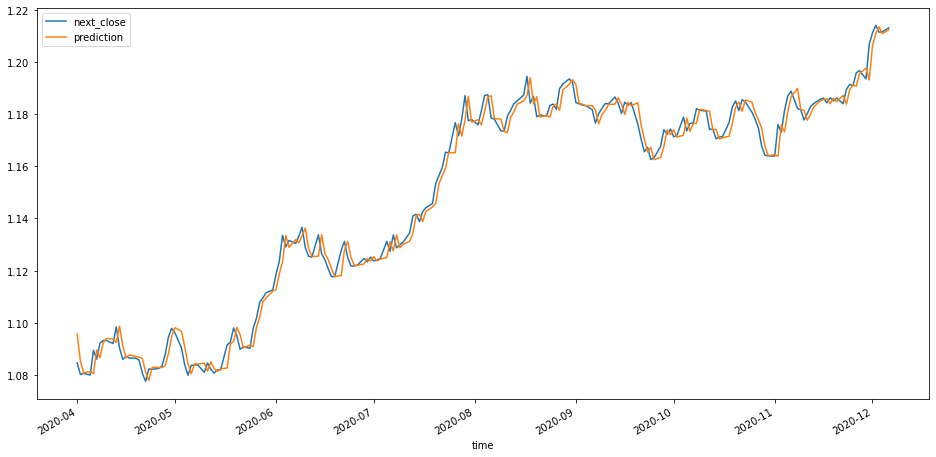

In [22]:
test_df.plot(y=['next_close', 'prediction'], figsize=(16, 8))

In [99]:
from sklearn.metrics import mean_squared_error, r2_score

In [100]:
y_label = test_df['next_close']
y_pred = test_df['prediction']
test_mse = mean_squared_error(y_label, y_pred)
test_r2 = r2_score(y_label, y_pred)

print('MSE', test_mse)
print('R2', test_r2)

MSE 1.4134464347105407
R2 -872.5528946460689


In [74]:
test_df['action'] = test_df['prediction'] > test_df['close']

<ipython-input-74-05558c8bed98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['action'] = test_df['prediction'] > test_df['close']


<ipython-input-18-2a26b8700529>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['margin'] = test_df['return']*test_df['action']


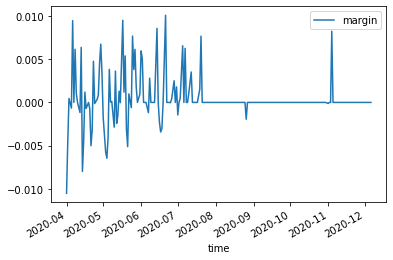

In [18]:
test_df['margin'] = test_df['return']*test_df['action']
test_df.plot(y='margin')


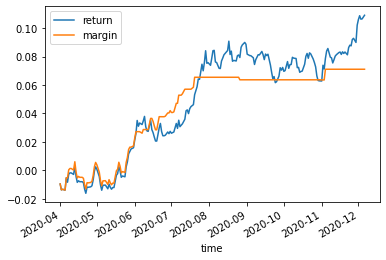

In [19]:
result = test_df[['return', 'margin']]
result = result / test_df['close'].values[0]


result.cumsum().plot()

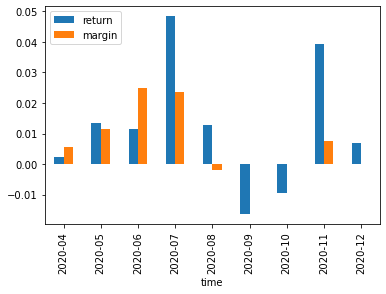

In [20]:
result.resample('M', kind='period').sum().plot(kind='bar')